### A simple Metropolis Hastings algorithm

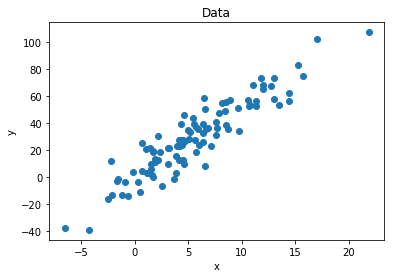

In [1]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt

beta = np.array([2,5])
sigma = np.sqrt(10)

# Generate the data from the true model
x=np.vstack([np.ones([100,]),np.random.normal(loc=5, scale=5, size=100)]).T
epsilon = np.random.normal(loc=0, scale=sigma**2, size=100) # epsilon ~ N(0,sigma^2)
y= np.dot(x,beta) + epsilon

# Plot the data
plt.scatter(x[:,1], y)
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
# Densities
from log_likelihood import *
theta = np.append(beta,sigma) # parameters

print(prior(theta))
print(log_likelihood(theta, y, x))
print(posterior(theta, y, x))
print(proposal(theta))

-10.9137387228
-732.507639305
-743.421378028
[ 2.09027532  4.6598257   3.05288059]


In [3]:
# maximize likelihood for initial parameters

objective = lambda theta: -log_likelihood(theta, y, x) # objective function

result = op.minimize(objective, theta) # maximization
res=result["x"]

beta0 = res[0:-1]
sigma0 = res[-1]
theta0 = np.append(beta0,sigma0) # initial parameters

In [7]:
# run Metropolis Hastings
from metropolis_hastings import *
ndraws=50000
burnin=25000

chain, acceptance = metropolis_hastings(theta0, ndraws, burnin, proposal, posterior, y, x)

Iteration 1000 with posterior likelihood -394.162236046115
Iteration 2000 with posterior likelihood -387.70789642137873
Iteration 3000 with posterior likelihood -389.76585631792904
Iteration 4000 with posterior likelihood -387.7982229573811
Iteration 5000 with posterior likelihood -394.4190206902033
Iteration 6000 with posterior likelihood -412.3230799947678
Iteration 7000 with posterior likelihood -392.7254094367647
Iteration 8000 with posterior likelihood -385.94152071255934
Iteration 9000 with posterior likelihood -388.7982222304041
Iteration 10000 with posterior likelihood -389.87058845960064
Iteration 11000 with posterior likelihood -391.64119302781836
Iteration 12000 with posterior likelihood -399.0919155327481
Iteration 13000 with posterior likelihood -399.1827158232468
Iteration 14000 with posterior likelihood -392.81657999337165
Iteration 15000 with posterior likelihood -390.0914414382362
Iteration 16000 with posterior likelihood -393.57746104560925
Iteration 17000 with poster

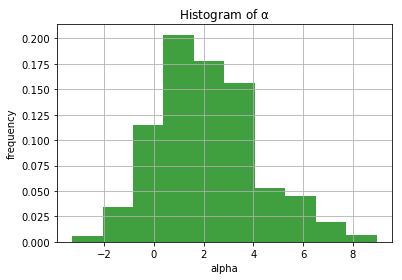

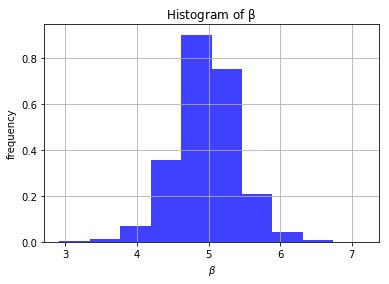

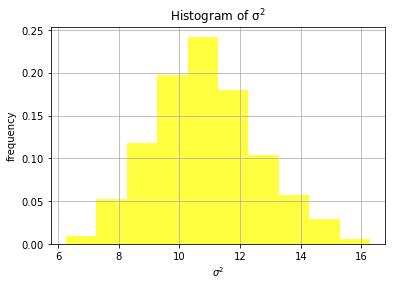

In [8]:
import matplotlib.pyplot as plt

plt.hist(chain[:,0], normed=1, facecolor='green', alpha=0.75)
plt.xlabel(r'alpha')
plt.ylabel('frequency')
plt.title(r'$\mathrm{Histogram\ of\ \alpha}$')
plt.grid(True)
plt.show()

plt.hist(chain[:,1], normed=1, facecolor='blue', alpha=0.75)
plt.xlabel(r'$\beta$')
plt.ylabel('frequency')
plt.title(r'$\mathrm{Histogram\ of\ \beta}$')
plt.grid(True)
plt.show()

plt.hist(chain[:,2], normed=1, facecolor='yellow', alpha=0.75)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('frequency')
plt.title(r'$\mathrm{Histogram\ of\ \sigma^2}$')
plt.grid(True)
plt.show()